In [1]:
from __future__ import with_statement,print_function

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from sie import *

## Iris Example

In [3]:
data=load_data('data/iris.csv')

In [4]:
x_sertosa=data[data['class']=='Iris-setosa']['petal length [cm]']
x_virginica=data[data['class']=='Iris-virginica']['petal length [cm]']
x_versicolor=data[data['class']=='Iris-versicolor']['petal length [cm]']

In [8]:
print (x_sertosa[:10])  # print the first 10

0    1.4
1    1.4
2    1.3
3    1.5
4    1.4
5    1.7
6    1.4
7    1.5
8    1.4
9    1.5
Name: petal length [cm], dtype: float64


In [11]:
x=x_sertosa
mu=sample_mean(x)
N=len(x)
sigma=sample_deviation(x)/sqrt(N)
t_sertosa=tdist(N,mu,sigma)

print ("total number of data points:",N)
print ("best estimate:",mu)
print ("uncertainty:",sigma)

total number of data points: 50
best estimate: 1.464
uncertainty: 0.0245381834898


In [12]:
x=x_versicolor
mu=sample_mean(x)
N=len(x)
sigma=sample_deviation(x)/sqrt(N)
t_versicolor=tdist(N,mu,sigma)

print ("total number of data points:",N)
print ("best estimate:",mu)
print ("uncertainty:",sigma)

total number of data points: 50
best estimate: 4.26
uncertainty: 0.0664554477121


In [13]:
x=x_virginica
mu=sample_mean(x)
N=len(x)
sigma=sample_deviation(x)/sqrt(N)
t_virginica=tdist(N,mu,sigma)

print ("total number of data points:",N)
print ("best estimate:",mu)
print ("uncertainty:",sigma)

total number of data points: 50
best estimate: 5.552
uncertainty: 0.078049696361


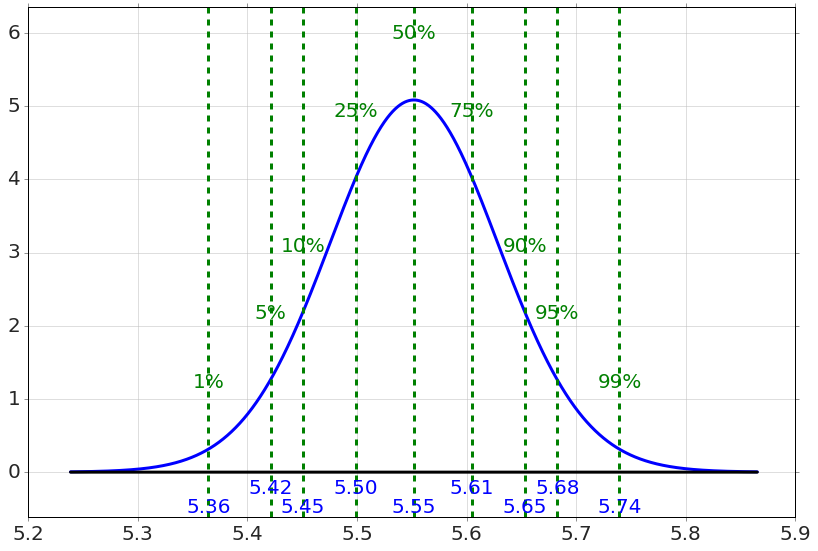

In [14]:
distplot(t_virginica)

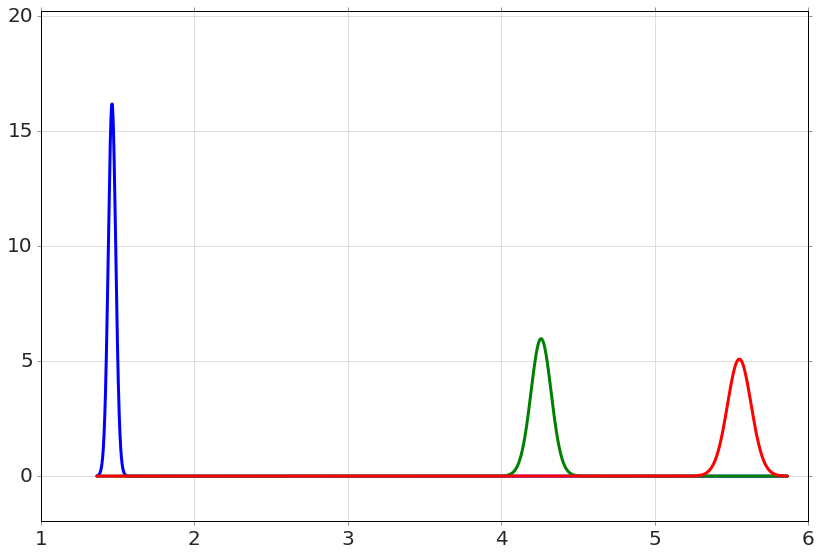

In [15]:
distplot2([t_sertosa,t_versicolor,t_virginica],show_quartiles=False)

In [16]:
credible_interval(t_versicolor)

(4.12652030510771, 4.2599999999999998, 4.3934796948922896)

In [17]:
credible_interval(t_virginica)

(5.3952325713636524, 5.5519999999999996, 5.7087674286363468)

## Sunrise

In [18]:
from sie import *

If you knew nothing about sunrises, and watched a year of them, what is the probability of another one tomorrow?

In [19]:
dist=beta(h=365,N=365)

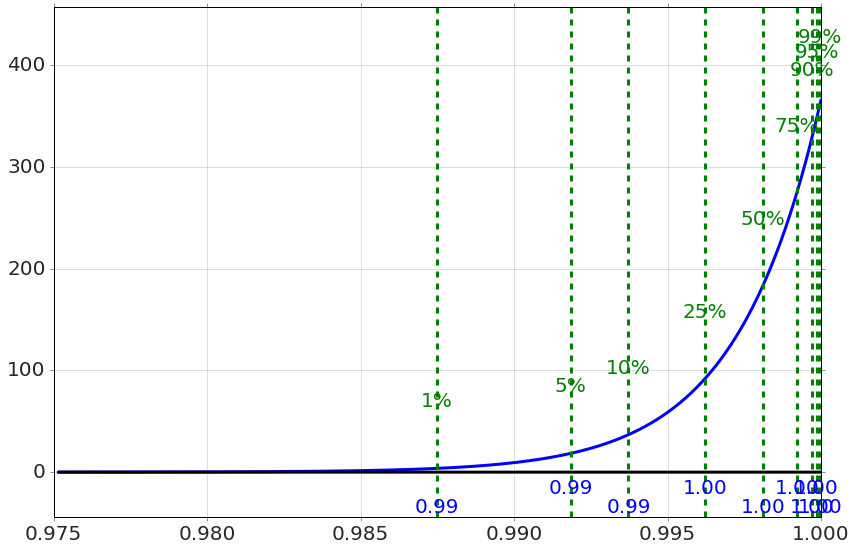

In [20]:
distplot(dist)

In [21]:
credible_interval(dist)

(0.98997171634278658, 0.99810794743679487, 0.99993082805373457)

## Cancer Example

In [22]:
dist=beta(h=7,N=10)

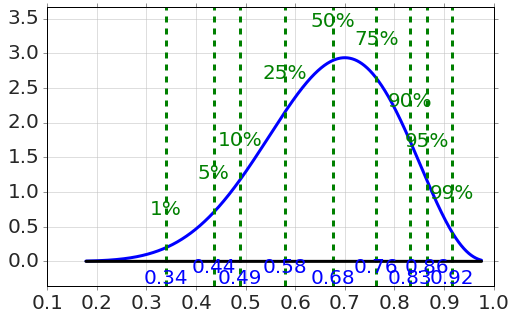

In [23]:
distplot(dist,figsize=(8,5))

In [24]:
credible_interval(dist)

(0.39025744042757882, 0.67619553741481253, 0.89073655618090186)

Essentially no evidence of any effect over 50 percent.

## Pennies

In [4]:
data1=load_data('data/pennies1.csv')
print (data1)
year,mass=data1['Year'],data1['Mass [g]']

    Year  Mass [g]
0   1960     3.133
1   1961     3.083
2   1962     3.175
3   1963     3.120
4   1964     3.100
5   1965     3.060
6   1966     3.100
7   1967     3.100
8   1968     3.073
9   1969     3.076
10  1970     3.100
11  1971     3.110
12  1972     3.080
13  1973     3.100
14  1974     3.093


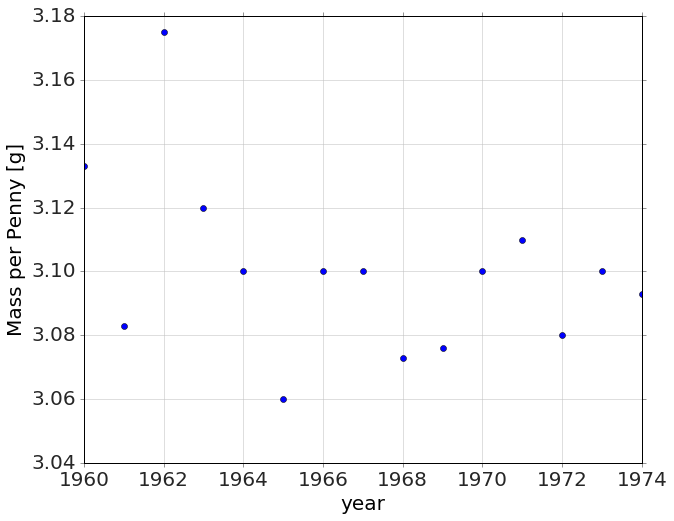

In [5]:
plot(year,mass,'o')
xlabel('year')
ylabel('Mass per Penny [g]')

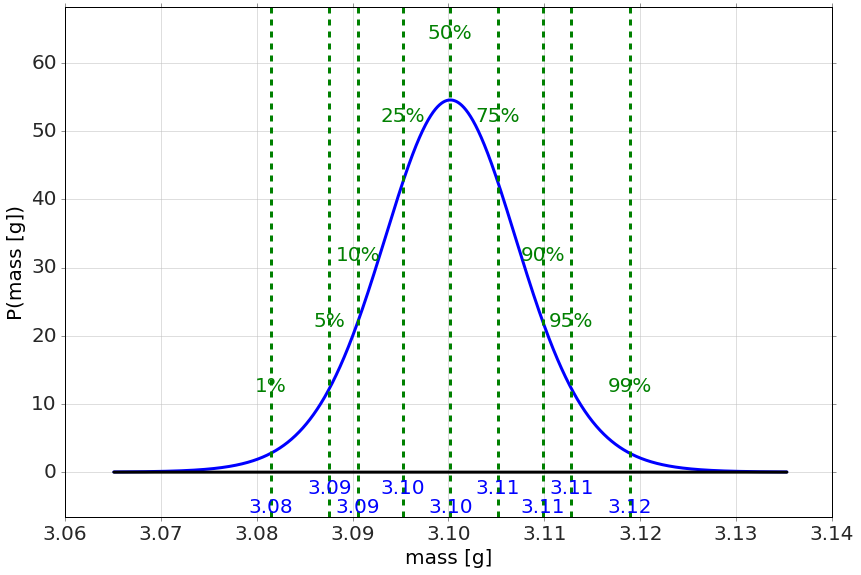

In [6]:
x=mass
mu=sample_mean(x)
N=len(x)
sigma=sample_deviation(x)/sqrt(N)
t_penny1=tdist(N,mu,sigma)

distplot(t_penny1,label='mass [g]')

In [7]:
CI=credible_interval(t_penny1,percentage=99)
print (CI)

(3.0790129206702503, 3.1002000000000001, 3.1213870793297498)


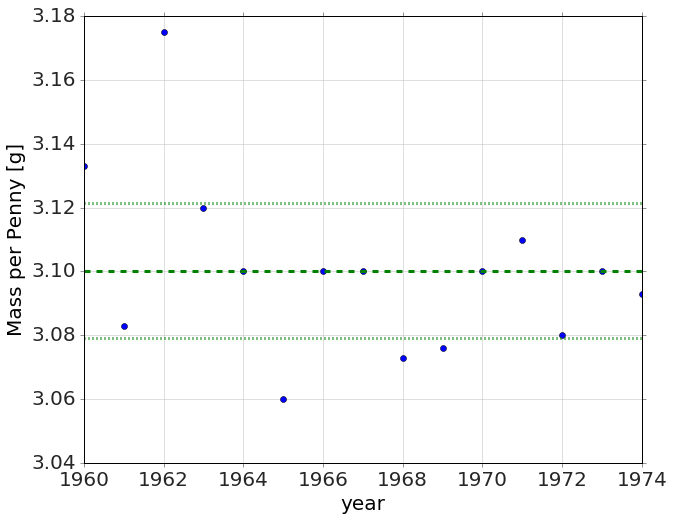

In [8]:
plot(year,mass,'o')
credible_interval_plot(t_penny1,percentage=99)
xlabel('year')
ylabel('Mass per Penny [g]')

### Do the 2 datasets

In [11]:
data2=load_data('data/pennies2.csv')
print (data2)
year1,mass1=year,mass
year2,mass2=data2['Year'],data2['Mass [g]']

    Year  Mass [g]
0   1989     2.516
1   1990     2.500
2   1991     2.500
3   1992     2.500
4   1993     2.503
5   1994     2.500
6   1995     2.497
7   1996     2.500
8   1997     2.494
9   1998     2.512
10  1999     2.521
11  2000     2.499
12  2001     2.523
13  2002     2.518
14  2003     2.520


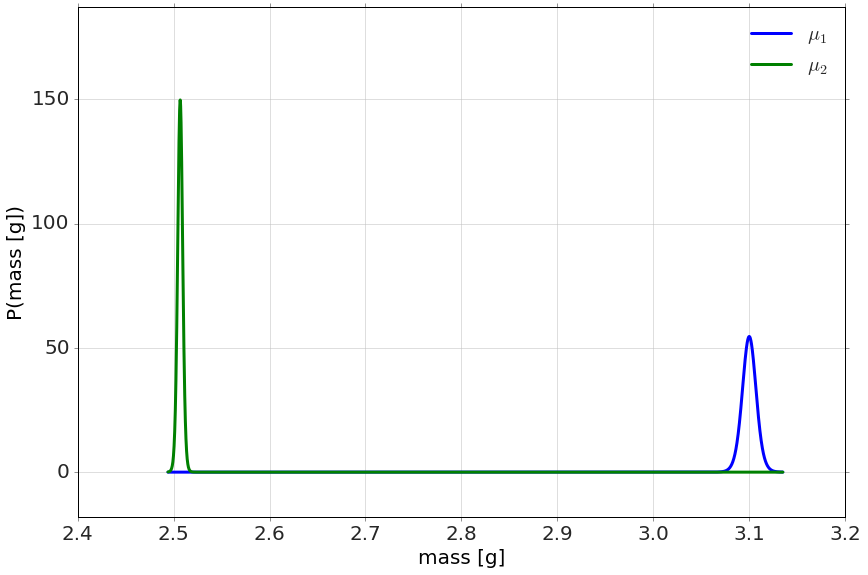

In [12]:
x=mass1
mu=sample_mean(x)
N=len(x)
sigma=sample_deviation(x)/sqrt(N)
t_penny1=tdist(N,mu,sigma)

x=mass2
mu=sample_mean(x)
N=len(x)
sigma=sample_deviation(x)/sqrt(N)
t_penny2=tdist(N,mu,sigma)

distplot2([t_penny1,t_penny2],show_quartiles=False,label='mass [g]')
legend([r'$\mu_1$',r'$\mu_2$'])


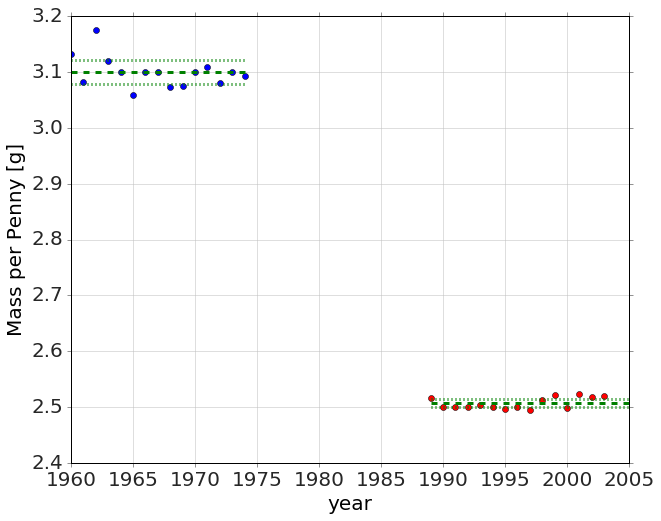

In [13]:
plot(year1,mass1,'o')
credible_interval_plot(t_penny1,percentage=99)
plot(year2,mass2,'ro')
credible_interval_plot(t_penny2,percentage=99,xlim=[1989,2005])
xlabel('year')
ylabel('Mass per Penny [g]')

### Distribution of the difference, normal approximation

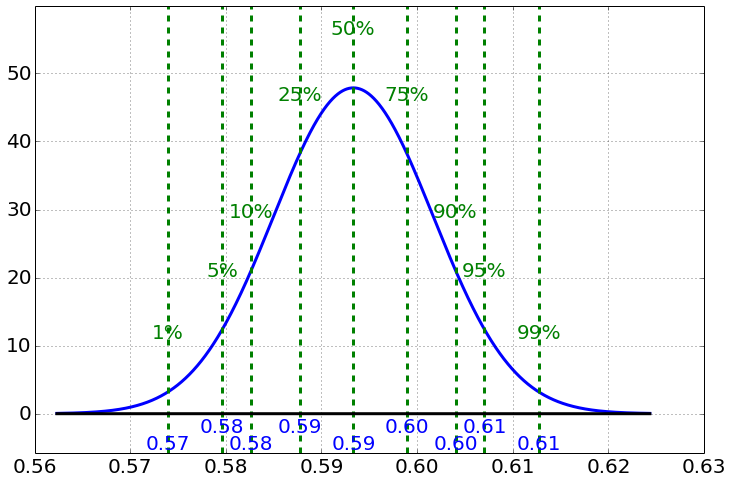

In [13]:
N1=len(mass1)
N2=len(mass2)

mu1=sample_mean(mass1)
mu2=sample_mean(mass2)


sigma1=(1+20.0/N1**2)*sample_deviation(mass1)/sqrt(N1)
sigma2=(1+20.0/N2**2)*sample_deviation(mass2)/sqrt(N1)


delta_12=mu1-mu2
sigma_delta12=sqrt(sigma1**2+sigma2**2)

dist_delta=normal(delta_12,sigma_delta12)
distplot(dist_delta)

clearly larger than zero at well over the 99% level.

## Ball Bearing Sizes

In [23]:
data1=[1.18,1.42,0.69,0.88,1.62,1.09,1.53,1.02,1.19,1.32]
data2=[1.72,1.62,1.69,0.79,1.79,0.77,1.44,1.29,1.96,0.99]
N1=len(data1)
N2=len(data2)

In [2]:
mu1=sample_mean(data1)
mu2=sample_mean(data2)
print mu1,mu2

1.194 1.406


In [24]:
S1=sample_deviation(data1)
S2=sample_deviation(data2)
print S1,S2

0.289681817786 0.428309337849


In [25]:
sigma1=S1/sqrt(N1)
sigma2=S2/sqrt(N2)
print sigma1,sigma2

0.091605434094 0.135443305072


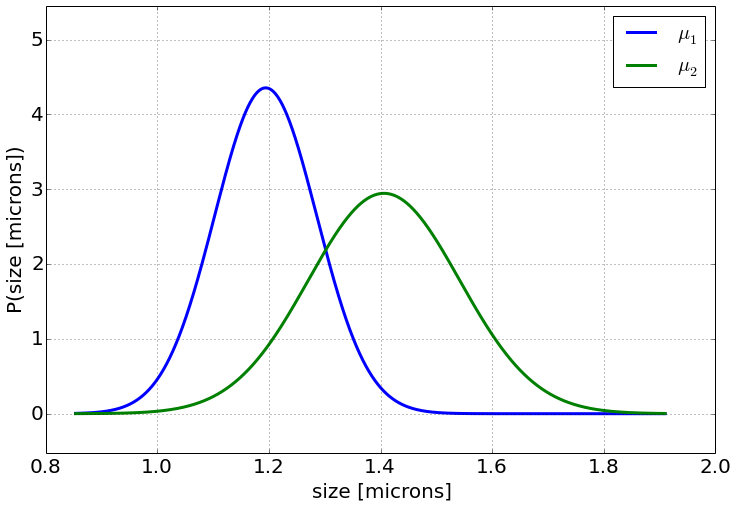

In [30]:
dist1=normal(mu1,sigma1)
dist2=normal(mu2,sigma2)
distplot2([dist1,dist2],show_quartiles=False,label='size [microns]')
legend([r'$\mu_1$',r'$\mu_2$'])